In [2]:
#### libraries
import numpy as np
# np.seterr(all='raise') # raise errors, don't just print warnings
from numpy import *
from numpy.linalg import eig
from numpy.random import normal
from scipy.optimize import curve_fit, least_squares
from random import random as rand

import sys

sys.path.append("C:\\Networking Experiment\\artiq codes\\artiq-master\\repository\\qn_artiq_routines")

#### local files
from utilities.physconsts import *
from utilities.rbconsts import *
from utilities.rbensemble import RbEnsemble as ensemble
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'utilities.physconsts'

In [3]:
sys.path

['D:\\Networking Exp Data\\Single atom characterization',
 'c:\\python39\\python39.zip',
 'c:\\python39\\DLLs',
 'c:\\python39\\lib',
 'c:\\python39',
 'C:\\Users\\QC\\.virtualenvs\\Networking_Exp_Data-0oRq_J3c',
 '',
 'C:\\Users\\QC\\.virtualenvs\\Networking_Exp_Data-0oRq_J3c\\lib\\site-packages',
 'C:\\Users\\QC\\.virtualenvs\\Networking_Exp_Data-0oRq_J3c\\lib\\site-packages\\win32',
 'C:\\Users\\QC\\.virtualenvs\\Networking_Exp_Data-0oRq_J3c\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\QC\\.virtualenvs\\Networking_Exp_Data-0oRq_J3c\\lib\\site-packages\\Pythonwin',
 'C:\\Networking Experiment\\artiq codes\\artiq-master\\repository\\qn_artiq_routines']

In [ ]:
# a test with 50 uK atoms
factor = 1
w0 = 2.5e-6 * factor # [m]
TFORT = 1.5e-3 * factor # [K]
Tatom = 5e-5 #* factor# [K]
steps = 10
tlist = linspace(0,160,steps) # time [us
lmda = 1.064e-6 * factor
wx = w0
wy = wx


umax = kB*TFORT #times factor

zR = pi*wx**2/lmda
zRFactor = factor

omega_r = (1/sqrt((wx**2+wy**2)/2))*sqrt(2*kB*TFORT/mRb) # radial trap frequency

omega_z = (1/zR)*sqrt(2*kB*TFORT/mRb) # axial trap frequency

omega_r_unfactored = omega_r*sqrt(factor)
print(omega_z, omega_z*sqrt(factor))
# ww = lambda z: (1+z**2/zR**2)
# U = lambda x, y, z: -umax*exp(-2*x**2/(wx**2*ww(z))-2*y**2/(wy**2*ww(z)))/ww(z) 
event_ct = 200000


In [691]:
def U(x,y,z):
    ww = (1+z**2/zR**2)
    return -umax*exp(-2*x**2/(wx**2*ww)-2*y**2/(wy**2*ww))/ww

In [692]:
def xdist(T, events,plane=None):
        T *= 1e-6
        """ position component distributions """
        # Grainger group method
        omega_r
        omega_z
        
        dx = dy = sqrt(kB*T/(mRb*omega_r**2))
        dx
        dz = sqrt(kB*T/(mRb*omega_z**2))
        zlist = normal(0,dz,size=events)
        xlist = normal(0,dx,size=events)
        ylist = normal(0,dy,size=events)
        # print(xlist)
        if plane == 'xz':
            return xlist,zlist
        else:
            return xlist,ylist,zlist

In [568]:
U(*xdist(50,2000))

array([-1.89406502e-26, -1.90832908e-26, -1.88342745e-26, ...,
       -2.04618604e-26, -1.71606201e-26, -1.97216434e-26])

In [569]:
 def vdist(T, events):
        """ maxwell boltzmann speeds """
        atoms = ensemble(T)
        T *= 1e-6
        vlist = atoms.sampling_maxboltzv(events,[0,2]) # speeds

        vxlist = empty(events)
        vylist = empty(events)
        vzlist = empty(events)
        
        for i in range(events):
            ex = 2*rand()-1
            ey = 2*rand()-1
            ez = 2*rand()-1
            v = vlist[i]
            A = sqrt(ex**2+ey**2+ez**2)
            vxlist[i] = ex*v/A
            vylist[i] = ey*v/A
            vzlist[i] = ez*v/A
            
#         vlist = array([sqrt(vx**2+vy**2+vx**2) for vx,vy,vz in zip(vxlist,vylist,vzlist)])
#         plt.hist(vlist, 50, density=True) # show maxwell boltzmann speed dist
#         plt.xlabel('v')
#         plt.ylabel('occurences')
#         plt.show()

        return vxlist,vylist,vzlist



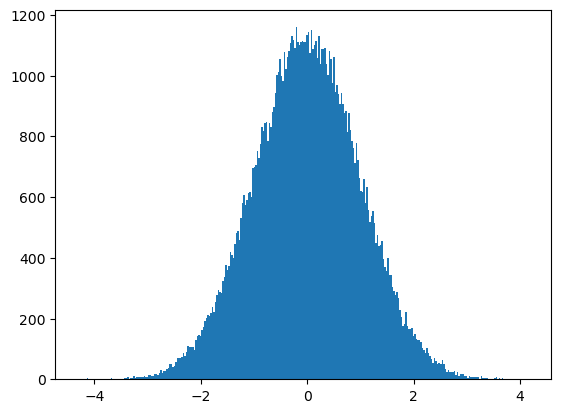

[ 1.12878418e+01 -1.89981923e-02  1.99917287e+00 -2.12095093e-03]


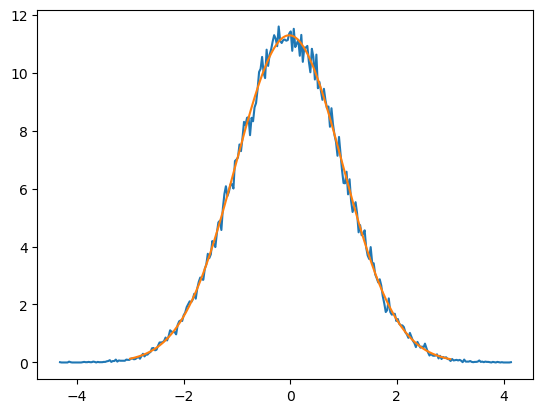

In [926]:
init_guess = (100,30,10,33000)

upper_bounds = [10000,40,100,40000]
lower_bounds = [100,5,2,10000]

def model(x, a, x0, w0, b):
    return a*np.exp(-2*((x-x0)/w0)**2) + b

xdata = np.linspace(-3, 3,100000)
ydata = normal(size = len(xdata))
count, bins, ignored = plt.hist(ydata, bins = 300)
plt.show()
count/=100
bins = bins[0:300]
plt.plot(bins,count)
popt,pcov = curve_fit(model,bins,count)

print(popt)
plt.plot(xdata,model(xdata,*popt))

In [693]:
def distplot(T,events, atoms=True, sx=1.5, sz=1.5, color="bone"):
        """ show atoms in FORT in z = 0 plane before drop and recapture """
        mu = 1e-6
        print(f"zr={zR/mu:.0f} [um], wx={wx/mu:.0f} [um]")
        
        xlist,ylist = xdist(T=T,events=events,plane='xz') # positions in [m]
        
        xpts = linspace(-sx*wx,sx*wx,100)
        zpts = linspace(-sz*zR,sz*zR,100)
        xx,zz = meshgrid(xpts,zpts)
        fpts = -U(xx,0,zz) # the fort intensity eval'd on the meshgrid
        
        cmap = plt.cm.get_cmap(color)
        
        plt.contourf(xpts/mu,zpts/mu,fpts, cmap=cmap)
        if atoms is True: # otherwise, just a dipole trap plot  
            plt.scatter(xlist/mu,ylist/mu,color='red')
        plt.xlabel("x")
        plt.ylabel("z")
#         plt.axes().set_aspect('equal')
        plt.show() 


In [1130]:
def drop_recap(tlist,T=None,events=None,base_retention=None, Tdepth = None,
            progress=False, b = 1, c = 0):
        """ Procedure for simulating a release ("drop") and recapture experiment
            to deduce the temperature of actual atoms in such an experiment. 
        
            Based on code by Mark, with some corrections
            'wx': waist
            'Tdepth': FORT temperature depth
            'T': atom temp
            'tmax': max time in units us
            'steps': number of FORT drop outs
            'events': number of release-recapture events per data pt
            'wy': optional waist for eliptical FORT 
        """
        zR = pi*wx**2/lmda
        
        tlist = 1e-6*tlist
    
        if events is None:
            events = 2000
        if base_retention is None:
            base_retention = 1 # the retention baseline with no fort drop

        retention = empty(len(tlist))
        
        xlist,ylist,zlist = xdist(T,events)
        vzlist,vxlist,vylist = vdist(T,events)
        #print(xlist)
        g_scaled = g*1e3
        for j,t in enumerate(tlist):

            escape = 0 
            nhot = 0 # this is an untrapped atom
            
            for i in range(events):     
                hot = 0
                KE = .5*mRb*((vxlist[i]-g*t)**2+vylist[i]**2
                              +vzlist[i]**2)
                PE0 = U(xlist[i],ylist[i],zlist[i])
                PE = U(xlist[i]+t*vxlist[i]+.5*g*(t)**2,
                       ylist[i]+t*vylist[i],
                       zlist[i]+t*vzlist[i])

                if KE + PE0 > 0:
                    hot = 1
                nhot += hot
                if KE + PE > 0:
                    escape += 1-hot
            retention[j] = base_retention*(1 - escape/events)
            
            if progress is not False:
                if j % 10 == 0:
                    print(f"timestep {j}: t = {t*1e6:.0f} [us], ret = {retention[j]:.2f}")

        retention = (retention*b - c)
        tlist*=1e6
        plt.plot(tlist,retention,label=f'{T/1e-6:.0f} uK') # show time in units [us]
#         plt.xlabel("time [us]")
#         plt.ylabel("retention")
#         plt.ylim((0,1))
#         plt.legend()
#         plt.show()        

        
        print(f"finished. T={T*1e6} [uK], r = {base_retention}")
        return tlist, retention

In [1131]:
def retention_at_t_2(t, T=None, events=None, base_retention=None,
                   progress=False, t_target = 0, Tdepth = None,lmda = None, wx = None, wy = None ):
        """ Procedure for simulating a release ("drop") and recapture experiment
            to deduce the temperature of actual atoms in such an experiment.

            Based on code by Mark, with some corrections
            'wx': waist
            'Tdepth': FORT temperature depth
            'T': atom temp
            'tmax': max time in units us
            'steps': number of FORT drop outs
            'events': number of release-recapture events per data pt
            'wy': optional waist for eliptical FORT
        """
        if wy is None:
            wy = wx
        
        umax = kB*Tdepth
        zR = pi*wx**2/lmda
        
        omega_r = (1/sqrt((wx**2+wy**2)/2))*sqrt(2*kB*TFORT/mRb) # radial trap frequency

        omega_z = (1/zR)*sqrt(2*kB*TFORT/mRb) # axial trap frequency

        
        # Tdepth = Tdepth
        def U(x,y,z):
            ww = (1+z**2/zR**2)
            return -umax*exp(-2*x**2/(wx**2*ww)-2*y**2/(wy**2*ww))/ww
            
        
        dx = dy = sqrt(kB*T/(mRb*omega_r**2))
        dx
        dz = sqrt(kB*T/(mRb*omega_z**2))            
        zlist = normal(0,dz,size=events)        
        xlist = normal(0,dx,size=events)
        ylist = normal(0,dy,size=events)


        atoms = ensemble(T)
            
        vlist = atoms.sampling_maxboltzv(events,[0,2]) # speeds
    
        vxlist = empty(events)
        vylist = empty(events)
        vzlist = empty(events)
            
        for i in range(events):
            ex = 2*rand()-1                
            ey = 2*rand()-1
            ez = 2*rand()-1
            v = vlist[i]
            A = sqrt(ex**2+ey**2+ez**2)
            vxlist[i] = ex*v/A
            vylist[i] = ey*v/A
            vzlist[i] = ez*v/A
            #print(f"A:{i}::",A)
        
        
    
        # t = t*1e-6

        if events is None:
            events = 2000
        if base_retention is None:
            base_retention = 1  # the retention baseline with no fort drop
        

        #xlist, ylist, zlist = xdist(T,events)
        #vzlist, vxlist, vylist = vdist(T,events)
        # print(xlist)
        escape = 0
        nhot = 0  # this is an untrapped atom

        for i in range(events):
            hot = 0
            KE = .5 * mRb * ((vxlist[i] - g * t) ** 2 + vylist[i] ** 2
                             + vzlist[i] ** 2)
            PE0 = U(xlist[i], ylist[i], zlist[i])
            PE = U(xlist[i] + t * vxlist[i] + .5 * g * (t) ** 2,
                        ylist[i] + t * vylist[i],
                        zlist[i] + t * vzlist[i])

            
            # print(f"t = {t}")

            hot = 1*(KE + PE0 > 0)
            nhot += hot
            escape = (1 - hot)*(KE + PE > 0)

        retention = base_retention * (1 - escape / events)




        

        print(f"finished. T={T * 1e6} [uK], r = {base_retention}")
        return retention



In [1222]:
def retention_at_t_3(t, T=None,base_retention=0.9,):
        """ Procedure for simulating a release ("drop") and recapture experiment
            to deduce the temperature of actual atoms in such an experiment.

            Based on code by Mark, with some corrections
            'wx': waist
            'Tdepth': FORT temperature depth
            'T': atom temp
            'tmax': max time in units us
            'steps': number of FORT drop outs
            'events': number of release-recapture events per data pt
            'wy': optional waist for eliptical FORT
        """
        T = abs(T)
        events = 20000
        factor = 1
        w0 = 2.5e-6 * factor # [m]
        Tdepth = 1.5e-3 * factor # [K]
        Tatom = 5e-5 #* factor# [K]
        steps = 10
        lmda = 1.064e-6 * factor
        wx = w0
        wy = wx
        
        
        umax = kB*Tdepth
        zR = pi*wx**2/lmda
        
        omega_r = (1/sqrt((wx**2+wy**2)/2))*sqrt(2*kB*TFORT/mRb) # radial trap frequency

        omega_z = (1/zR)*sqrt(2*kB*TFORT/mRb) # axial trap frequency

        
    
        
        # Tdepth = Tdepth
        def U(x,y,z):
            ww = (1+z**2/zR**2)
            return -umax*exp(-2*x**2/(wx**2*ww)-2*y**2/(wy**2*ww))/ww
            
        
        dx = dy = sqrt(kB*T/(mRb*omega_r**2))
        dx
        dz = sqrt(kB*T/(mRb*omega_z**2))            
        zlist = normal(0,dz,size=events)        
        xlist = normal(0,dx,size=events)
        ylist = normal(0,dy,size=events)


        atoms = ensemble(T)
            
        vlist = atoms.sampling_maxboltzv(events,[0,2]) # speeds
        
        vxlist = empty(events)
        vylist = empty(events)
        vzlist = empty(events)
            
        for i in range(events):
            ex = 2*rand()-1                
            ey = 2*rand()-1
            ez = 2*rand()-1
            v = vlist[i]
            A = sqrt(ex**2+ey**2+ez**2)
            vxlist[i] = ex*v/A
            vylist[i] = ey*v/A
            vzlist[i] = ez*v/A
            #print(f"A:{i}::",A)
        
        
    
        t = t*1e-6

        if events is None:
            events = 20000
        if base_retention is None:
            base_retention = 1  # the retention baseline with no fort drop
        

        #xlist, ylist, zlist = xdist(T,events)
        #vzlist, vxlist, vylist = vdist(T,events)
        #print(xlist)
        escape = np.float64(np.empty(len(t)))
        nhot = 0  # this is an untrapped atom

        for i in range(events):
            hot = 0
            KE = .5 * mRb * ((vxlist[i] - g * t) ** 2 + vylist[i] ** 2
                             + vzlist[i] ** 2)
            PE0 = U(xlist[i], ylist[i], zlist[i])
            PE = U(xlist[i] + t * vxlist[i] + .5 * g * (t) ** 2,
                        ylist[i] + t * vylist[i],
                        zlist[i] + t * vzlist[i])

            
            #print(f"t = {t}")
            
            
            init_E = KE + PE0
            hot_E = KE + PE
            
            escape+=(np.float64((np.greater(hot_E,0))))
                
        retention = base_retention * (1 - escape / np.float64(events))




        

        print(f"finished. T={T * 1e6} [uK], r = {base_retention}, b = , c = ")
        
        return retention



In [1223]:
TLIST = linspace(0,120,10) # time [us]
R1 = retention_at_t_3(TLIST, 5e-5, base_retention = 0.9)
print(R1)

5e-05
1.3807e-23
5e-05
1.4192261e-25
1
finished. T=50.0 [uK], r = 0.9, b = , c = 
[0.8999955  0.871641   0.64393875 0.4282425  0.29196    0.20772
 0.1552725  0.11943    0.09468    0.075555  ]


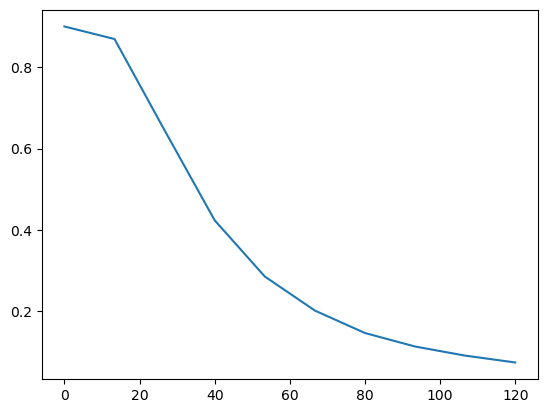

In [1138]:
plt.plot(TLIST,R1)

In [1083]:
def retention_at_t(t, T=None, events=None, base_retention=None,
                   progress=False, Tdepth = None,):
        """ Procedure for simulating a release ("drop") and recapture experiment
            to deduce the temperature of actual atoms in such an experiment.

            Based on code by Mark, with some corrections
            'wx': waist
            'Tdepth': FORT temperature depth
            'T': atom temp
            'tmax': max time in units us
            'steps': number of FORT drop outs
            'events': number of release-recapture events per data pt
            'wy': optional waist for eliptical FORT
        """
        
        # Tdepth = Tdepth
        def U(x,y,z):
            ww = (1+z**2/zR**2)
            return -umax*exp(-2*x**2/(wx**2*ww)-2*y**2/(wy**2*ww))/ww
        def xdist(T, events,plane=None):
            """ position component distributions """
            # Grainger group method
            omega_r
            omega_z
            
            dx = dy = sqrt(kB*T/(mRb*omega_r**2))
            dx
            dz = sqrt(kB*T/(mRb*omega_z**2))
            zlist = normal(0,dz,size=events)
            xlist = normal(0,dx,size=events)
            ylist = normal(0,dy,size=events)
            # print(xlist)
            if plane == 'xz':
                return xlist,zlist
            else:
                return xlist,ylist,zlist
        
        def vdist(T, events):
            """ maxwell boltzmann speeds """
            #atoms = ensemble(T)
            
            #vlist = atoms.sampling_maxboltzv(events,[0,2]) # speeds
    
            vxlist = empty(events)
            vylist = empty(events)
            vzlist = empty(events)
            
            for i in range(events):
                ex = 2*rand()-1
                ey = 2*rand()-1
                ez = 2*rand()-1
                v = vlist[i]
                A = sqrt(ex**2+ey**2+ez**2)
                vxlist[i] = ex*v/A
                vylist[i] = ey*v/A
                vzlist[i] = ez*v/A
                
    #         vlist = array([sqrt(vx**2+vy**2+vx**2) for vx,vy,vz in zip(vxlist,vylist,vzlist)])
    #         plt.hist(vlist, 50, density=True) # show maxwell boltzmann speed dist
    #         plt.xlabel('v')
    #         plt.ylabel('occurences')
    #         plt.show()

            return vxlist,vylist,vzlist
    
        t = t*1e-6

        if events is None:
            events = 2000
        if base_retention is None:
            base_retention = 1  # the retention baseline with no fort drop
        

        xlist, ylist, zlist = xdist(T,events)
        vzlist, vxlist, vylist = vdist(T,events)
        # print(xlist)
        escape = 0
        nhot = 0  # this is an untrapped atom

        for i in range(events):
            hot = 0
            KE = .5 * mRb * ((vxlist[i] - g * t) ** 2 + vylist[i] ** 2
                             + vzlist[i] ** 2)
            PE0 = U(xlist[i], ylist[i], zlist[i])
            PE = U(xlist[i] + t * vxlist[i] + .5 * g * (t) ** 2,
                        ylist[i] + t * vylist[i],
                        zlist[i] + t * vzlist[i])

            
            # print(f"t = {t}")

            hot = 1*(KE + PE0 > 0)
            nhot += hot
            escape = (1 - hot)*(KE + PE > 0)

        retention = base_retention * (1 - escape / events)        

        print(f"finished. T={T * 1e6} [uK], r = {base_retention}")
        return retention

In [1084]:
def run_drop(tlist, Tatom):
    rlist = retention_at_t(tlist, T=Tatom, base_retention=0.9, Tdepth = TFORT, events = event_ct)
    #rlist = drop_recap(tlist, T=Tatom, base_retention = 0.9)
    return np.log(rlist)

In [1056]:
def run_drop_3(tlist, Tatom, base_retention):
    # print(Tatom)
    rlist = retention_at_t_2(tlist, T=Tatom, base_retention=base_retention, Tdepth = TFORT, events = event_ct, wx = wx, lmda = lmda,)
    #rlist = drop_recap(tlist, T=Tatom, base_retention = 0.9)
    return rlist


In [1057]:
def run_drop_2(t,Tatom, wx1, Tdepth1):
    rlist = retention_at_t_2(t, T=Tatom, events=event_ct, base_retention=0.9,
                   progress=True, Tdepth = Tdepth1,lmda = lmda, wx = wx1, wy = None )
    return rlist
def run_drop_4(t,Tatom, wx1, Tdepth1, base_retention):
    rlist = retention_at_t_2(t, T=Tatom, events=event_ct, base_retention=base_retention,
                   progress=True, Tdepth = Tdepth1,lmda = lmda, wx = wx1, wy = None )
    return rlist

In [1058]:
def run_drop_log_params(x, log_T_0,):
    """
    Model for Bcd gradient: exponential decay plus 
    background with log parameters.
    """
    
    # Exponentiate parameters
    T_0 = np.exp(log_T_0)
    
    return run_drop(x, T_0)
    

In [ ]:
Tatom = 5e-5

5e-05
1.3807e-23
5e-05
1.4192261e-25
1
finished. T=50.0 [uK], r = 0.9


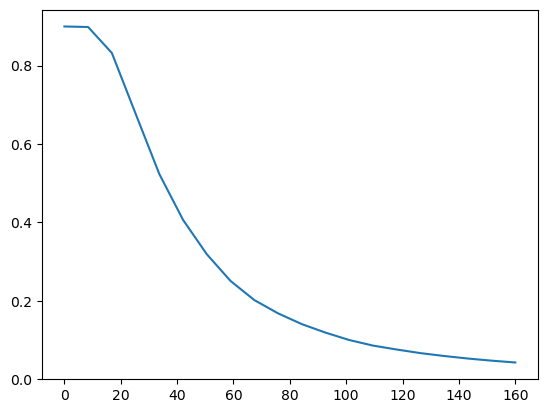

In [1224]:
#distplot(Tatom, events = event_ct)
tlist = linspace(0,160,20) # time [us]
TLIST = linspace(0,160,20) # time [us]
tlist, r1 = drop_recap(tlist, 5e-5, base_retention = 0.9, events = 20000)

5e-05
1.3807e-23
5e-05
1.4192261e-25
1
finished. T=50.0 [uK], r = 0.9, b = , c = 


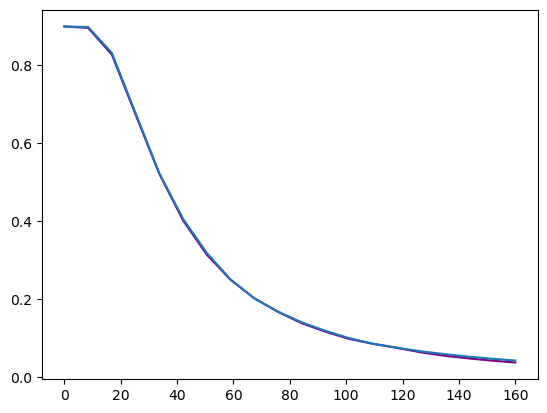

In [1225]:
R1 = retention_at_t_3(TLIST, 5e-5, base_retention = 0.9)
plt.plot(TLIST,R1, color = "purple")
plt.plot(tlist,r1)

In [ ]:
print((tlist))

In [1226]:
t_data = array([0.0, 2.0, 4.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 
                20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0])
ret_data = [0.92079207920792083, 0.94999999999999996, 0.93000000000000005, 
            0.89000000000000001, 0.93999999999999995, 0.90000000000000002, 
            0.93999999999999995, 0.84999999999999998, 0.85999999999999999, 
            0.81000000000000005, 0.67000000000000004, 0.39000000000000001, 
            0.28712871287128711, 0.27000000000000002, 0.16, 0.10000000000000001, 
            0.089999999999999997]
factor = 1
lower_bound = [1e-5*factor]
upper_bound = [9e-5*factor]


popt, pcov, infodict, msg, ier = curve_fit(retention_at_t_3, TLIST, R1, p0 = [4e-5], absolute_sigma=False, maxfev = 1000000000, full_output = True,epsfcn = 1)



4e-05
1.3807e-23
4e-05
1.4192261e-25
1
finished. T=40.0 [uK], r = 0.9, b = , c = 
8e-05
1.3807e-23
8e-05
1.4192261e-25
1
finished. T=80.0 [uK], r = 0.9, b = , c = 
5.4273343312049145e-05
1.3807e-23
5.4273343312049145e-05
1.4192261e-25
1
finished. T=54.27334331204914 [uK], r = 0.9, b = , c = 
0.00010854668662409829
1.3807e-23
0.00010854668662409829
1.4192261e-25
1
finished. T=108.54668662409829 [uK], r = 0.9, b = , c = 
4.849630541770588e-05
1.3807e-23
4.849630541770588e-05
1.4192261e-25
1
finished. T=48.496305417705884 [uK], r = 0.9, b = , c = 
9.699261083541176e-05
1.3807e-23
9.699261083541176e-05
1.4192261e-25
1
finished. T=96.99261083541177 [uK], r = 0.9, b = , c = 
5.091205532176655e-05
1.3807e-23
5.091205532176655e-05
1.4192261e-25
1
finished. T=50.91205532176655 [uK], r = 0.9, b = , c = 
0.0001018241106435331
1.3807e-23
0.0001018241106435331
1.4192261e-25
1
finished. T=101.8241106435331 [uK], r = 0.9, b = , c = 
4.944684985816567e-05
1.3807e-23
4.944684985816567e-05
1.4192261e-25

In [1227]:
t_data = array([0.0, 2.0, 4.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 
                20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0])
ret_data = [0.92079207920792083, 0.94999999999999996, 0.93000000000000005, 
            0.89000000000000001, 0.93999999999999995, 0.90000000000000002, 
            0.93999999999999995, 0.84999999999999998, 0.85999999999999999, 
            0.81000000000000005, 0.67000000000000004, 0.39000000000000001, 
            0.28712871287128711, 0.27000000000000002, 0.16, 0.10000000000000001, 
            0.089999999999999997]
R1 = retention_at_t_3(TLIST, 5e-5, base_retention = 0.9)
factor = 1
lower_bound = [1e-5*factor]
upper_bound = [9e-5*factor]


popt, pcov, infodict, msg, ier = curve_fit(retention_at_t_3, TLIST, R1, p0 = [4e-5, 0.89999], absolute_sigma=False, maxfev = 1000000000, full_output = True,epsfcn = 1)



5e-05
1.3807e-23
5e-05
1.4192261e-25
1
finished. T=50.0 [uK], r = 0.9, b = , c = 
4e-05
1.3807e-23
4e-05
1.4192261e-25
1
finished. T=40.0 [uK], r = 0.89999, b = , c = 
8e-05
1.3807e-23
8e-05
1.4192261e-25
1
finished. T=80.0 [uK], r = 0.89999, b = , c = 
4e-05
1.3807e-23
4e-05
1.4192261e-25
1
finished. T=40.0 [uK], r = 1.79998, b = , c = 
5.340060004995473e-05
1.3807e-23
5.340060004995473e-05
1.4192261e-25
1
finished. T=53.400600049954726 [uK], r = 0.9077787209369785, b = , c = 
0.00010680120009990946
1.3807e-23
0.00010680120009990946
1.4192261e-25
1
finished. T=106.80120009990945 [uK], r = 0.9077787209369785, b = , c = 
5.340060004995473e-05
1.3807e-23
5.340060004995473e-05
1.4192261e-25
1
finished. T=53.400600049954726 [uK], r = 1.815557441873957, b = , c = 
4.600987571496465e-05
1.3807e-23
4.600987571496465e-05
1.4192261e-25
1
finished. T=46.00987571496465 [uK], r = 0.8936263253776263, b = , c = 
9.20197514299293e-05
1.3807e-23
9.20197514299293e-05
1.4192261e-25
1
finished. T=92.0197

In [1228]:
t_data = array([0.0, 2.0, 4.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 
                20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0])
ret_data = [0.92079207920792083, 0.94999999999999996, 0.93000000000000005, 
            0.89000000000000001, 0.93999999999999995, 0.90000000000000002, 
            0.93999999999999995, 0.84999999999999998, 0.85999999999999999, 
            0.81000000000000005, 0.67000000000000004, 0.39000000000000001, 
            0.28712871287128711, 0.27000000000000002, 0.16, 0.10000000000000001, 
            0.089999999999999997]
factor = 1
lower_bound = [1e-5*factor]
upper_bound = [9e-5*factor]
R1 = retention_at_t_3(TLIST, 5e-5, base_retention = 0.9) + (normal(0,0.05,len(R1)))

popt, pcov, infodict, msg, ier = curve_fit(retention_at_t_3, TLIST, R1, p0 = [4e-5, 0.89995], absolute_sigma=False, maxfev = 1000000000, full_output = True,epsfcn = 1)



5e-05
1.3807e-23
5e-05
1.4192261e-25
1
finished. T=50.0 [uK], r = 0.9, b = , c = 
4e-05
1.3807e-23
4e-05
1.4192261e-25
1
finished. T=40.0 [uK], r = 0.89995, b = , c = 
8e-05
1.3807e-23
8e-05
1.4192261e-25
1
finished. T=80.0 [uK], r = 0.89995, b = , c = 
4e-05
1.3807e-23
4e-05
1.4192261e-25
1
finished. T=40.0 [uK], r = 1.7999, b = , c = 
6.159500005895226e-05
1.3807e-23
6.159500005895226e-05
1.4192261e-25
1
finished. T=61.59500005895226 [uK], r = 0.9437540849571249, b = , c = 
0.0001231900001179045
1.3807e-23
0.0001231900001179045
1.4192261e-25
1
finished. T=123.19000011790452 [uK], r = 0.9437540849571249, b = , c = 
6.159500005895226e-05
1.3807e-23
6.159500005895226e-05
1.4192261e-25
1
finished. T=61.59500005895226 [uK], r = 1.8875081699142497, b = , c = 
4.9667875722444854e-05
1.3807e-23
4.9667875722444854e-05
1.4192261e-25
1
finished. T=49.667875722444855 [uK], r = 0.920657427747934, b = , c = 
9.933575144488971e-05
1.3807e-23
9.933575144488971e-05
1.4192261e-25
1
finished. T=99.3357

In [1242]:
t_data = array([0.0, 2.0, 4.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 
                20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0])
ret_data = [0.92079207920792083, 0.92999999999999996, 0.93000000000000005, 
            0.89000000000000001, 0.93999999999999995, 0.90000000000000002, 
            0.93999999999999995, 0.84999999999999998, 0.85999999999999999, 
            0.81000000000000005, 0.67000000000000004, 0.39000000000000001, 
            0.28712871287128711, 0.27000000000000002, 0.16, 0.10000000000000001, 
            0.089999999999999997]
factor = 1
lower_bound = [1e-5*factor]
upper_bound = [9e-5*factor]
R1 = retention_at_t_3(TLIST, 6e-5, base_retention = 0.9) + (normal(0,0.02,len(R1)))

popt, pcov, infodict, msg, ier = curve_fit(retention_at_t_3, t_data, ret_data, p0 = [4e-5, 0.95], absolute_sigma=False, maxfev = 1000000000, full_output = True,epsfcn = 1.2,xtol = 1e-12, ftol = 1e-15)



6e-05
1.3807e-23
6e-05
1.4192261e-25
1
finished. T=60.0 [uK], r = 0.9, b = , c = 
4e-05
1.3807e-23
4e-05
1.4192261e-25
1
finished. T=40.0 [uK], r = 0.95, b = , c = 
8.381780460041329e-05
1.3807e-23
8.381780460041329e-05
1.4192261e-25
1
finished. T=83.81780460041328 [uK], r = 0.95, b = , c = 
4e-05
1.3807e-23
4e-05
1.4192261e-25
1
finished. T=40.0 [uK], r = 1.9906728592598155, b = , c = 
2.456389313872435e-05
1.3807e-23
2.456389313872435e-05
1.4192261e-25
1
finished. T=24.56389313872435 [uK], r = 0.8921094957008665, b = , c = 
5.147228988317576e-05
1.3807e-23
5.147228988317576e-05
1.4192261e-25
1
finished. T=51.472289883175755 [uK], r = 0.8921094957008665, b = , c = 
2.456389313872435e-05
1.3807e-23
2.456389313872435e-05
1.4192261e-25
1
finished. T=24.56389313872435 [uK], r = 1.8693664848207117, b = , c = 
2.96361002874718e-05
1.3807e-23
2.96361002874718e-05
1.4192261e-25
1
finished. T=29.636100287471802 [uK], r = 0.9087653548807214, b = , c = 
6.210082157533908e-05
1.3807e-23
6.2100821

In [872]:
print(type(retention_at_t_3(15, T=50,base_retention=0.9)))

50
1.3807e-23
50
1.4192261e-25
1


KeyboardInterrupt: 

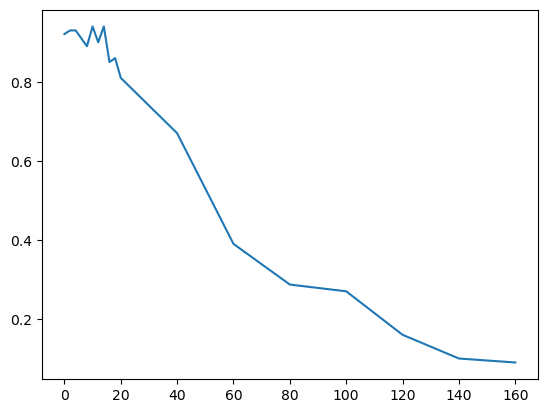

In [1234]:
plt.plot(t_data, ret_data)

In [1243]:
print(popt)
print(pcov)
print(infodict)
print(msg)
print(ier)

[2.83345356e-05 9.06375322e-01]
[[8.78745244e-12 2.19271992e-08]
 [2.19271992e-08 1.81309121e-04]]
{'fvec': array([-0.01446207, -0.02366999, -0.02366999,  0.01633001, -0.03389657,
        0.00555963, -0.03616242,  0.04944186,  0.0321006 ,  0.07136068,
       -0.02605234,  0.02464603, -0.0122388 , -0.07645311, -0.01865784,
        0.00703756, -0.00407985]), 'nfev': 32, 'fjac': array([[-1.48686250e+04, -4.39612902e-05, -9.81975262e-05,
        -9.13236994e-03, -3.13250158e-02, -7.18806039e-02,
        -1.27558547e-01, -1.89226554e-01, -2.60714388e-01,
        -3.29256438e-01, -5.88694577e-01, -4.58582570e-01,
        -3.17767239e-01, -2.29487869e-01, -1.67328580e-01,
        -1.25496409e-01, -1.05169698e-01],
       [ 1.79818478e+00, -2.73520625e+00,  3.65556207e-01,
         3.62884893e-01,  3.56422155e-01,  3.44297963e-01,
         3.27145655e-01,  3.06957047e-01,  2.82924466e-01,
         2.58345587e-01,  7.97731004e-02,  2.57738919e-02,
         1.52489470e-02,  7.49994614e-03,  7.20

2.833453562621967e-05
1.3807e-23
2.833453562621967e-05
1.4192261e-25
1
timestep 0: t = 0 [us], ret = 0.91
finished. T=28.334535626219672 [uK], r = 0.9063753222866535
[0.90637532 0.89572541 0.69967643 0.47367174 0.32339471 0.22913168
 0.1695375  0.13001954 0.10151404 0.08184569]


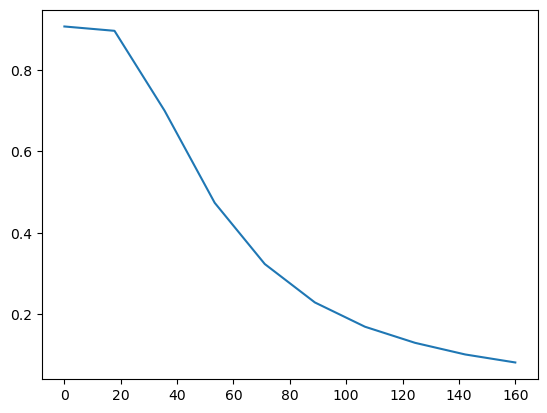

In [1244]:
Topt = popt[0]
ropt = popt[1]
#bopt = popt[2]
#copt = popt[3]
tlist2 = np.linspace(0,160,10)
tlist2, ret2 = drop_recap(tlist2,T=(Topt),base_retention=ropt, Tdepth = TFORT,
            progress=True, events = 20000)
print(ret2)

[  0.           8.42105263  16.84210526  25.26315789  33.68421053
  42.10526316  50.52631579  58.94736842  67.36842105  75.78947368
  84.21052632  92.63157895 101.05263158 109.47368421 117.89473684
 126.31578947 134.73684211 143.15789474 151.57894737 160.        ] [0.9      0.89865  0.83232  0.677475 0.52335  0.406305 0.318645 0.25047
 0.201735 0.167805 0.14031  0.118575 0.099675 0.085455 0.07542  0.066195
 0.05886  0.05238  0.046935 0.0423  ]


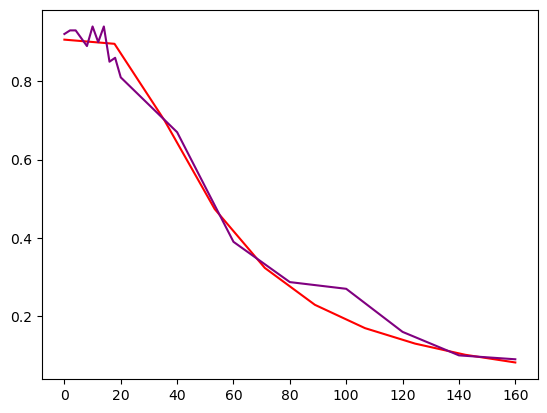

In [1245]:
#tlist3, ret3 = drop_recap(tlist, T=5, base_retention=0.9, Tdepth = TFORT, progress=True, events = event_ct)
plt.plot(tlist2, ret2, color = "red") # show time in units [us]
#plt.plot(tlist3*1e6,ret3, color = "purple") # show time in units [us]
plt.plot(t_data, ret_data, color = "purple") # show time in units [us]
print(tlist,r1)
plt.show()